<a href="https://colab.research.google.com/github/Risha-art/MAT-422/blob/main/HW_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**2.3 Independent Variables & Random Samples**##


####**2.3.1 Joint Probability Distributions**####

Typically in real life, we are often interested in several random variables that are related to one another. Joint probability is the probability of two or more events happening together while a joint probability distribution shows a probability distribution for two (or more) random variables

A **discrete random variable** is one which may take on only a countable number of distinct values such as 0,1,2,3,4,........ Discrete random variables are usually (but not necessarily) counts. If a random variable can take only a finite number of distinct values, then it must be discrete.

A **continuous random variable** is one which takes an infinite number of possible values. Continuous random variables are usually measurements. Examples include height, weight, the amount of sugar in an orange, the time required to run a mile.

The **probability mass function** (pmf) of a single discrete random variable *X* can be extended to two variables *X*,*Y* to describe how much probability mass is placed on each possible pair of values (x,y).
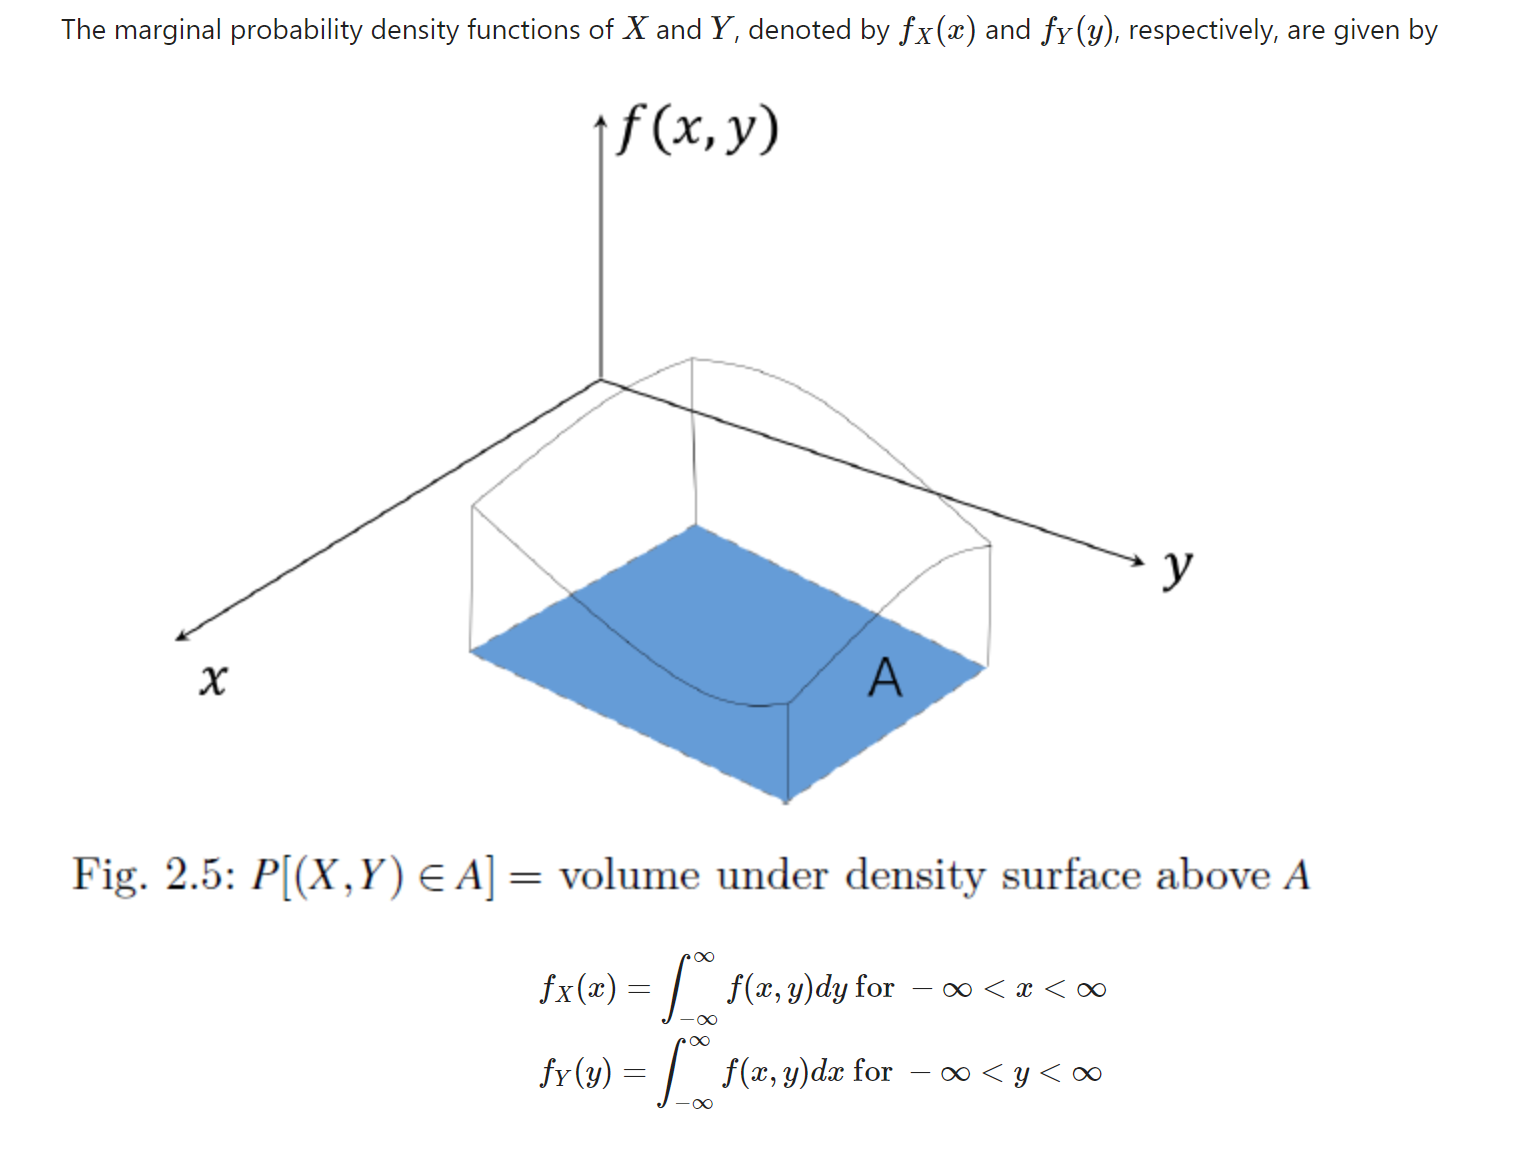


The concept of **independent random variables** is very similar to independent events. In many situations, information about the observed value of one of the two variables *X* and *Y* gives information about the value of the other variable. **Independent random variables** describe a situation where the occurrence of one does not affect the probability of occurrence of the other (equivalently, does not affect the odds). One way of defining independence of two events is via the condition P(A∩B)= P(A) ⋅ P(B).

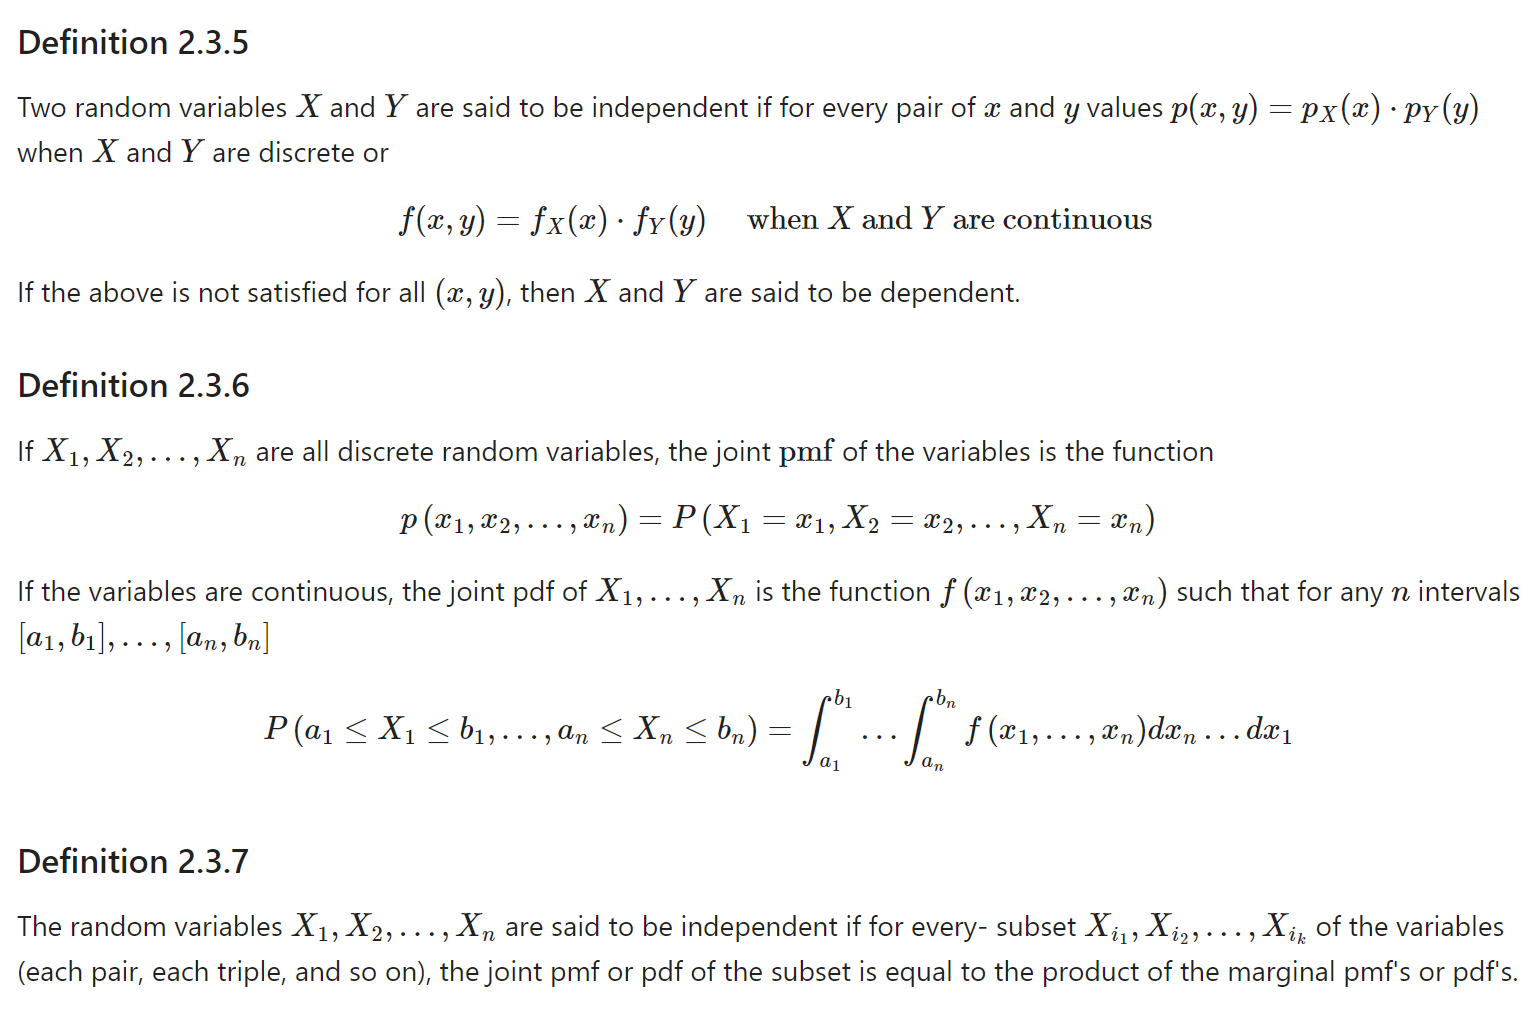

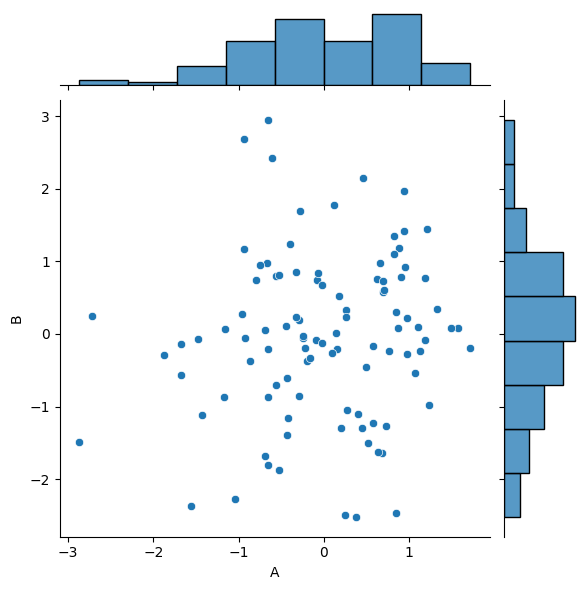

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

A = np.random.normal(size=100)
B = np.random.normal(size=100)
df = pd.DataFrame({'A' : A , 'B':B})
sns.jointplot(x='A', y='B' ,data=df )



The above plot illustrates the joint probability distribution for normal random variables A and B. Our normal variables A and B by using the normal() function of the random module of numpy. we generated an array of 100 random numbers drawn from a standard normal distribution with a mean of 0. The size parameter specifies size of array to generate.

####**2.3.2 Correlation and Dependence**####

Correlations are useful because they can indicate a predictive relationship that can be exploited in practice. Covariance is a measure of the joint variability of two random variables. Correlations can be quantified with coefficients *r* and the closer the values are to one, the stronger the correlation is.

The covariance between two random variable's *X* and *Y* is

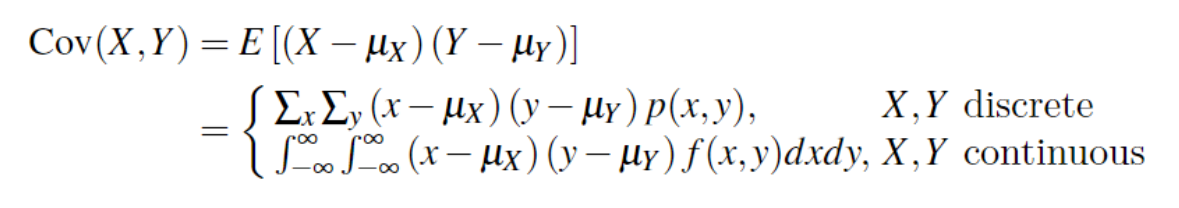

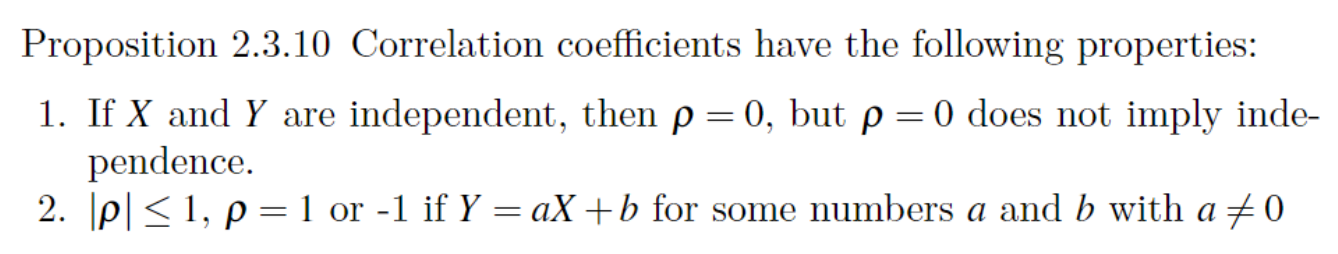

In [8]:
import numpy as np
Sample_data = np.array([[11,20,35],[40,58,64],[71,87,96]])
print("This is Sample array:","\n",Sample_data)
print("The Covariance of Sample data:","\n",np.cov(Sample_data))

This is Sample array: 
 [[11 20 35]
 [40 58 64]
 [71 87 96]]
The Covariance of Sample data: 
 [[147.         138.         146.5       ]
 [138.         156.         157.        ]
 [146.5        157.         160.33333333]]


[[ 1.  -0.7]
 [-0.7  1. ]]


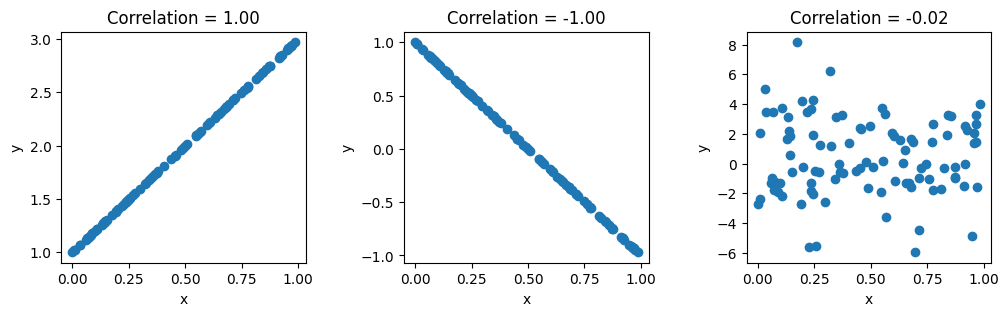

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_simple = np.array([-2, -1, 0, 1, 2])
y_simple = np.array([4, 1, 3, 2, 0])
my_rho = np.corrcoef(x_simple, y_simple)
print(my_rho)
seed = 13
rand = np.random.RandomState(seed)

x = rand.uniform(0,1,100)
x = np.vstack((x,x*2+1))
x = np.vstack((x,-x[0,]*2+1))
x = np.vstack((x,rand.normal(1,3,100)))

rho = np.corrcoef(x)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
for i in [0,1,2]:
  ax[i].scatter(x[0,],x[1+i,])
  ax[i].title.set_text('Correlation = ' + "{:.2f}".format(rho[0,i+1]))
  ax[i].set(xlabel='x',ylabel='y')

fig.subplots_adjust(wspace=.4)
plt.show()

####**2.3.3 Random Samples**####
A simple random sample is a randomly selected subset of a population and often is used in practice.  

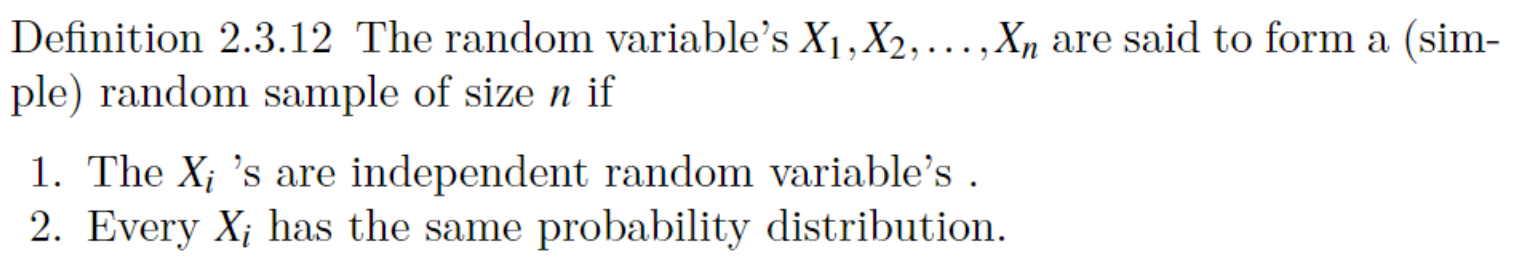

**2.3.3.2 The Central Limit Theorem**

The central limit theorem (CLT) states that the appropriately scaled sum of independent random variables approaches a normal distribution, regardless of whether the original variables follow a normal distribution. This theorem is fundamental in probability theory, as it allows probabilistic and statistical methods designed for normal distributions to be applied to a wide range of problems involving other distributions. The formal statement of this theorem is considered one of the most essential results in probability. Its uses vary from population parameter estimation, hypothesis testing, confidence interval and sampling techniques.

We can demonstrate the central limit theorem in python with the following example. We will generate random numbers from -40 to 40 and and collect their mean in a list. we will iteratively perform his operation for different count of numbers and we will plot their sampling distribution.

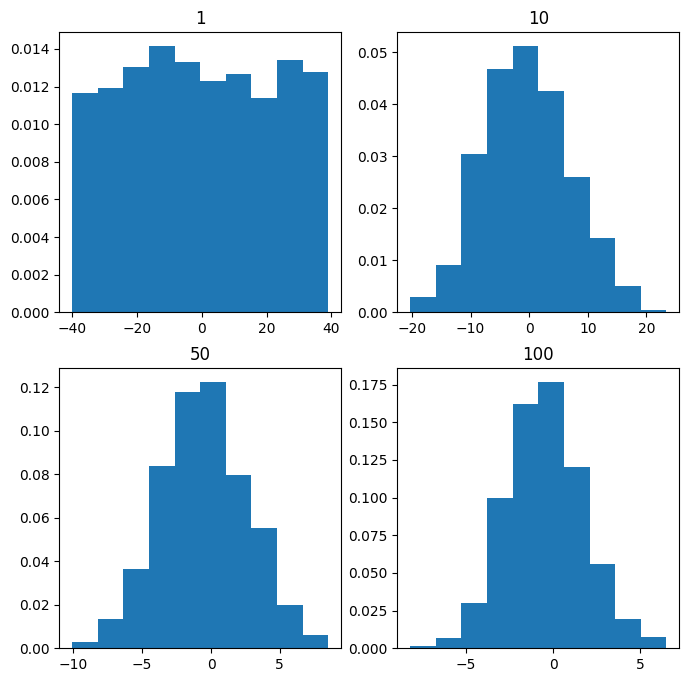

In [4]:
import numpy
import matplotlib.pyplot as plt

# number of sample
num = [1, 10, 50, 100]
# list of sample means
means = []

# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    numpy.random.seed(1)
    x = [numpy.mean(
        numpy.random.randint(
            -40, 40, j)) for _i in range(1000)]
    means.append(x)
k = 0

# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()


It is evident from the graphs that as we keep on increasing the sample size from 1 to 100 the histogram tends to take the shape of a normal distribution. Generally, the Central Limit Theorem is used when the sample size is fairly large-: at least greater than or equal to 30.